In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Stationary Time Series

Time series are stationary if they do not have trend or seasonal efects. When a time series
is stationary, it can be easier to model.

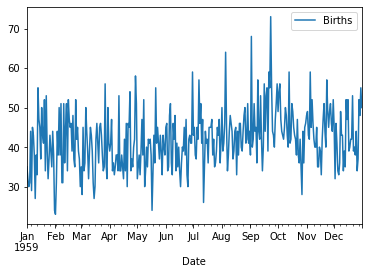

In [2]:
df = pd.read_csv('./dataset/daily-total-female-births.csv', index_col='Date', parse_dates=['Date'])
df.plot()
plt.show()

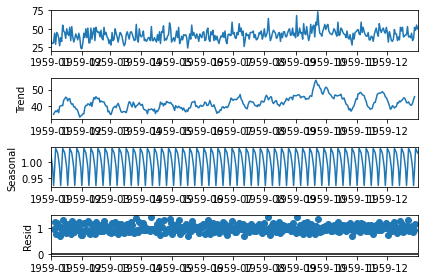

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df, model='multiplicative')
results.plot()
plt.show()

<AxesSubplot:xlabel='Month'>

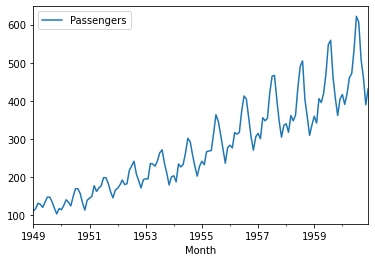

In [4]:
df_ap = pd.read_csv('./dataset/airline-passengers.csv', index_col='Month', parse_dates=['Month'])
df_ap.plot()

## Types of Stationary Time Series

The notion of stationarity comes from the theoretical study of time series and it is a useful
abstraction when forecasting. There are some finer-grained notions of stationarity that you may
come across if you dive deeper into this topic. They are:
* Stationary Process: A process that generates a stationary series of observations.
* Stationary Model: A model that describes a stationary series of observations.
* Trend Stationary: A time series that does not exhibit a trend.
* Seasonal Stationary: A time series that does not exhibit seasonality.
* Strictly Stationary: A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.

## Stationary Time Series and Forecasting

Should you make your time series stationary? Generally, yes. If you have clear trend and
seasonality in your time series, then model these components, remove them from observations,
then train models on the residuals.

If we fit a stationary model to data, we assume our data are a realization of a
stationary process. So our frst step in an analysis should be to check whether there
is any evidence of a trend or seasonal efects and, if there is, remove them.

## Checks for Stationarity

There are many methods to check whether a time series (direct observations, residuals, otherwise)
is stationary or non-stationary.
* Look at Plots: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
* Summary Statistics: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant diferences.
* Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have been violated.

## Summary Statistics

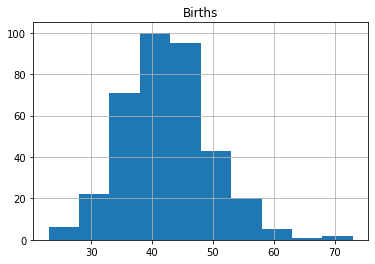

In [5]:
df_births = df.copy(deep=True)
df_births.hist()
plt.show()

In [6]:
X_births = df_births.values.flatten()
X_ap = df_ap.values.flatten()

def summary_stats(arr):
    split = int(len(arr)/2)
    X1, X2 = arr[:split], arr[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    return (mean1, mean2, var1, var2)

mean_births1, mean_births2, var_births1, var_births2 = summary_stats(X_births)
mean_ap1, mean_ap2, var_ap1, var_ap2 = summary_stats(X_ap)

In [7]:
print('mean1=%f, mean2=%f' % (mean_births1, mean_births2))
print('variance1=%f, variance2=%f' % (var_births1, var_births2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


In [8]:
print('mean1=%f, mean2=%f' % (mean_ap1, mean_ap2))
print('variance1=%f, variance2=%f' % (var_ap1, var_ap2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


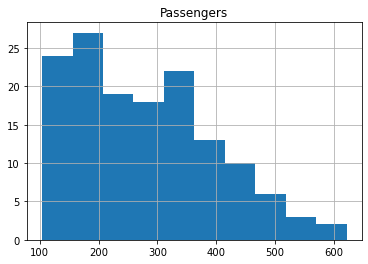

In [9]:
df_ap.hist()
plt.show()

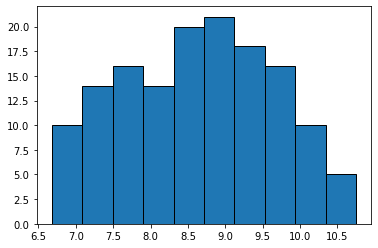

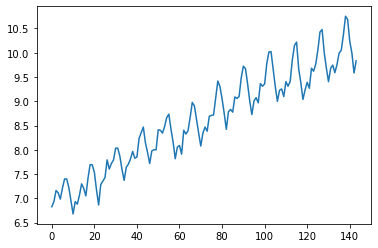

In [10]:
from scipy.stats import boxcox
X = df_ap.values.flatten()
X_log = np.log(X)
X_bc, lmbd = boxcox(X)

plt.hist(X_bc, edgecolor='k')
plt.show()
plt.plot(X_bc)
plt.show()

In [11]:
mean_ap1, mean_ap2, var_ap1, var_ap2 = summary_stats(X_bc)
print('mean1=%f, mean2=%f' % (mean_ap1, mean_ap2))
print('variance1=%f, variance2=%f' % (var_ap1, var_ap2))

mean1=7.788257, mean2=9.454254
variance1=0.316018, variance2=0.285204


## Augmented Dickey-Fuller test

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [24]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Births'])

print(
f'''
ADF Statistic: {result[0]}
p-value: {result[1]}
Critical Values:
'''
)
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.808291253559765
p-value: 5.2434129901498554e-05
Critical Values:

	1%: -3.449
	5%: -2.870
	10%: -2.571


In [27]:
result = adfuller(df_ap)

print(
f'''
ADF Statistic: {result[0]}
p-value: {result[1]}
Critical Values:
'''
)
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
 


ADF Statistic: 0.8153688792060488
p-value: 0.991880243437641
Critical Values:

	1%: -3.482
	5%: -2.884
	10%: -2.579


In [34]:
X, lmbda = boxcox(df_ap.values.flatten())
X_log = np.log(df_ap.values.flatten())

result = adfuller(X_log)

print(
f'''
ADF Statistic: {result[0]}
p-value: {result[1]}
Critical Values:
'''
)
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
 


ADF Statistic: -1.7170170891069598
p-value: 0.4223667747703916
Critical Values:

	1%: -3.482
	5%: -2.884
	10%: -2.579
